In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.datasets import load_breast_cancer 

raw_data = load_breast_cancer()
X,y = raw_data.data,raw_data.target 

np.isnan(X)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Train|test split

In [2]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

scaler = StandardScaler()

X_train,X_test,y_train,y_test = train_test_split( X, y, test_size =0.2,random_state=42 )

scaled_X_train = scaler.fit_transform(X_train) 
scaled_X_test = scaler.transform(X_test)

# MLP network

In [3]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, InputLayer 


def MLP():
    model = Sequential(name = "MLP") 
    model.add(InputLayer(X.shape[1], name="Input_layer"))
    model.add(Dense(32,name="Hidden1",activation = "relu"))  #change the initializer 
    model.add(Dense(32,name="Hidden2",activation = "relu"))  #change the initializer 
    model.add(Dense(1,name="Output",activation = "sigmoid")) 

    model.compile(loss="binary_crossentropy", optimizer="Adam")
    return model 

model = MLP() 
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


2022-04-20 11:37:59.128458: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.fit(scaled_X_train,y_train,epochs=500, validation_split=0.2,verbose=1)

Epoch 1/500
12/12 [==============================] - 2s 26ms/step - loss: 0.4588 - val_loss: 0.3881
Epoch 2/500
12/12 [==============================] - 0s 9ms/step - loss: 0.3230 - val_loss: 0.2735
Epoch 3/500
12/12 [==============================] - 0s 10ms/step - loss: 0.2250 - val_loss: 0.2019
Epoch 4/500
12/12 [==============================] - 0s 15ms/step - loss: 0.1656 - val_loss: 0.1625
Epoch 5/500
12/12 [==============================] - 0s 11ms/step - loss: 0.1294 - val_loss: 0.1417
Epoch 6/500
12/12 [==============================] - 0s 9ms/step - loss: 0.1060 - val_loss: 0.1292
Epoch 7/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0912 - val_loss: 0.1206
Epoch 8/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0793 - val_loss: 0.1155
Epoch 9/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0710 - val_loss: 0.1124
Epoch 10/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0647 - val_loss: 0.1103
E

<AxesSubplot:>

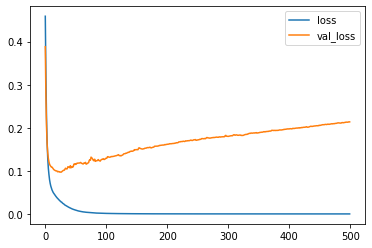

In [7]:
import pandas as pd 

pd.DataFrame(model.history.history).plot()

In [8]:
model = MLP() 
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(scaled_X_train,y_train,epochs=50)

In [ ]:
model.